**Put any package imports you need in the below space**

In [94]:
from igraph import *
import matplotlib.pyplot as plt
import numpy as np

**Exercise 1**: Generating the adjacency matrix A for graphs of particular type. Write a script that generates the adjacency matrix A for each of the following graphs and prints this matrix onto the screen:

1. K5: 5-clique, or a fully connected simple, undirected graph of 5 nodes

In [95]:
K5 = Graph.Full(5)
K5.get_adjacency()

Matrix([[0, 1, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 0, 1], [1, 1, 1, 1, 0]])

2. K5.3: two disconnected components, C1 and C2, where C1 is a 5-clique K5 and C2 is a 3-clique K3

In [96]:
K3 = Graph.Full(3)
K5_3 = K5 + K3
K5_3.get_adjacency()

Matrix([[0, 1, 1, 1, 1, 0, 0, 0], [1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 1, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 1, 0]])

3. K5.3e: Almost the same as K53 but there is a single edge connecting the two components

In [97]:
K5_3e = K5 + K3
K5_3e.add_edge(4,5)
K5_3e.get_adjacency()

Matrix([[0, 1, 1, 1, 1, 0, 0, 0], [1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 1, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0], [1, 1, 1, 1, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 1, 0]])

4. B2.3: Complete bi-partite graph with n1=2 nodes in the first part and n2=3 nodes in the second part

In [98]:
B2_3 = Graph.Full_Bipartite(2,3)
B2_3.get_adjacency()

Matrix([[0, 0, 1, 1, 1], [0, 0, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 0, 0, 0], [1, 1, 0, 0, 0]])

5. S5: A 5-vertex star (one central "hub" node that connects to all the other "spoke" nodes)

In [99]:
S5 = Graph.Star(5)
S5.get_adjacency()

Matrix([[0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0]])

6. P5: A simple path of 5 vertices

In [100]:
P5 = Graph()
P5.add_vertices(5)
P5.add_edges([(0,1),(1,2),(2,3),(3,4)])
P5.get_adjacency()

Matrix([[0, 1, 0, 0, 0], [1, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 1, 0, 1], [0, 0, 0, 1, 0]])

**Exercise 2**: Generating the degree matrix D for a given adjacency matrix A. Write a script that generates a degree matrix for each of the adjacency matrices in Exercise 1. Note that the degree matrix is a diagonal matrix where all the positions except for the diagonal are zero's. The diagonal elements correspond to the degrees of the corresponding nodes, namely Dii = degree(v_i).

In [101]:
def get_matrix_D(graph):
    v = graph.vcount()
    matrixD = np.zeros(shape=(v,v))
    for i in range(v):
        matrixD[i][i]=graph.degree(i)
    return matrixD

**Maxtrix D of K5:**

In [102]:
DK5 = get_matrix_D(K5)
DK5

array([[4., 0., 0., 0., 0.],
       [0., 4., 0., 0., 0.],
       [0., 0., 4., 0., 0.],
       [0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 4.]])

**Maxtrix D of K5.3:**

In [103]:
DK5_3 = get_matrix_D(K5_3)
DK5_3

array([[4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 4., 0., 0., 0., 0., 0., 0.],
       [0., 0., 4., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2.]])

**Maxtrix D of K5.3e:**

In [104]:
DK5_3e = get_matrix_D(K5_3e)
DK5_3e

array([[4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 4., 0., 0., 0., 0., 0., 0.],
       [0., 0., 4., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2.]])

**Maxtrix D of B2.3:**

In [105]:
DB2_3 = get_matrix_D(B2_3)
DB2_3

array([[3., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 2.]])

**Maxtrix D of S5:**

In [106]:
DS5 = get_matrix_D(S5)
DS5

array([[4., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

**Maxtrix D of P5:**

In [107]:
DP5 = get_matrix_D(P5)
DP5

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 1.]])

**Exercise 3**: Generating the graph Laplacian matrix L for a given adjacency matrix A and its degree matrix D. Write a script that generates the graph Laplacian matrix L = D - A for each of the adjacency matrices in Exercise 1.

In [108]:
def get_matrix_L(graph):
    return graph.laplacian()

**Maxtrix L of K5:**

In [109]:
LK5 = get_matrix_L(K5)
LK5

[[4, -1, -1, -1, -1],
 [-1, 4, -1, -1, -1],
 [-1, -1, 4, -1, -1],
 [-1, -1, -1, 4, -1],
 [-1, -1, -1, -1, 4]]

**Maxtrix L of K5.3:**

In [110]:
LK5_3 = get_matrix_L(K5_3)
LK5_3

[[4, -1, -1, -1, -1, 0, 0, 0],
 [-1, 4, -1, -1, -1, 0, 0, 0],
 [-1, -1, 4, -1, -1, 0, 0, 0],
 [-1, -1, -1, 4, -1, 0, 0, 0],
 [-1, -1, -1, -1, 4, 0, 0, 0],
 [0, 0, 0, 0, 0, 2, -1, -1],
 [0, 0, 0, 0, 0, -1, 2, -1],
 [0, 0, 0, 0, 0, -1, -1, 2]]

**Maxtrix L of K5.3e:**

In [111]:
LK5_3e = get_matrix_L(K5_3e)
LK5_3e

[[4, -1, -1, -1, -1, 0, 0, 0],
 [-1, 4, -1, -1, -1, 0, 0, 0],
 [-1, -1, 4, -1, -1, 0, 0, 0],
 [-1, -1, -1, 4, -1, 0, 0, 0],
 [-1, -1, -1, -1, 5, -1, 0, 0],
 [0, 0, 0, 0, -1, 3, -1, -1],
 [0, 0, 0, 0, 0, -1, 2, -1],
 [0, 0, 0, 0, 0, -1, -1, 2]]

**Maxtrix L of B2.3:**

In [112]:
LB2_3 = get_matrix_L(B2_3)
LB2_3

[[3, 0, -1, -1, -1],
 [0, 3, -1, -1, -1],
 [-1, -1, 2, 0, 0],
 [-1, -1, 0, 2, 0],
 [-1, -1, 0, 0, 2]]

**Maxtrix L of S5:**

In [113]:
LS5 = get_matrix_L(S5)
LS5

[[4, -1, -1, -1, -1],
 [-1, 1, 0, 0, 0],
 [-1, 0, 1, 0, 0],
 [-1, 0, 0, 1, 0],
 [-1, 0, 0, 0, 1]]

**Maxtrix L of P5:**

In [114]:
LP5 = get_matrix_L(P5)
LP5

[[1, -1, 0, 0, 0],
 [-1, 2, -1, 0, 0],
 [0, -1, 2, -1, 0],
 [0, 0, -1, 2, -1],
 [0, 0, 0, -1, 1]]

1. Is L a sparse matrix?

Ans: According to definitaion, when a matrix considered as a sparse matrix, the sparsity is greater than 0.5. Thus,L is not a sparse matrix in all case.
2. In what positions does L have non-zero elements?

Ans: connected vertices and diagonal.
3. What are the values of the non-diagonal and non-zero elements?

Ans: connected vertices.
4. What does L contain along its diagonal?

Ans: The degree of vetices.

**Exercise 4**: Generating the graph spectrum, or the multiset of the eigenvalues of the graph adjacency matrix A. Write a script that calculates the eigenvalues of the graph adjacency matrix for each of the matrices in Exercise 1. Plot the eigenvalues in the increasing order of their values

In [156]:
def plt_eigenvalue(graph,title):
    y = np.around(np.sort(np.linalg.eigvals(graph.get_adjacency().data)), decimials=3)
    print (f'{title}: {y}')
    plt.plot(y)
    plt.ylabel("Eigenvalue")
    plt.title(title)
    plt.show()

K5 Eigenvalues: [-1. -1. -1. -1.  4.]


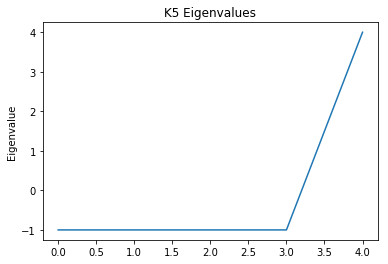

K5.3 Eigenvalues: [-1. -1. -1. -1. -1. -1.  2.  4.]


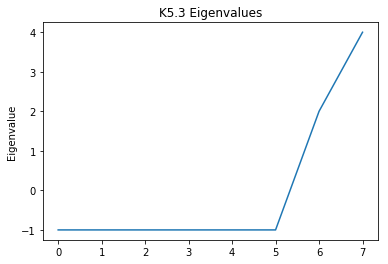

K5.3e Eigenvalues: [-1.77987114 -1.         -1.         -1.         -1.         -0.33658584
  2.05492255  4.06153444]


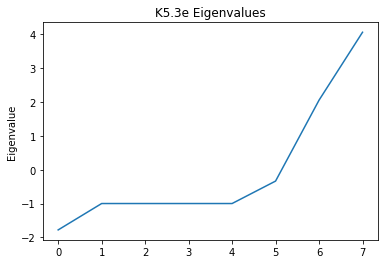

B2.3 Eigenvalues: [-2.44948974e+00  0.00000000e+00  0.00000000e+00  2.08925759e-16
  2.44948974e+00]


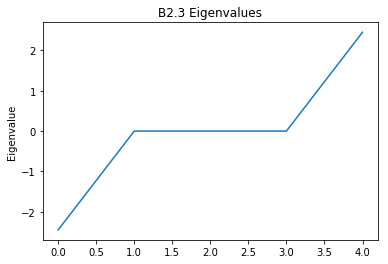

S5 Eigenvalues: [-2.  0.  0.  0.  2.]


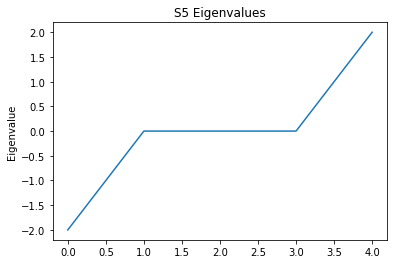

P5 Eigenvalues: [-1.73205081e+00 -1.00000000e+00 -3.29824209e-17  1.00000000e+00
  1.73205081e+00]


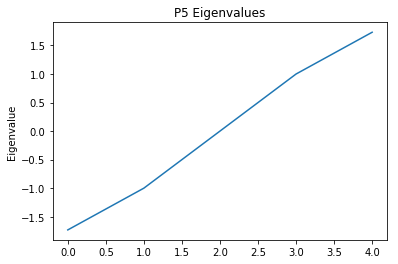

In [139]:
plt_eigenvalue(K5,"K5 Eigenvalues")
plt_eigenvalue(K5_3,"K5.3 Eigenvalues")
plt_eigenvalue(K5_3e,"K5.3e Eigenvalues")
plt_eigenvalue(B2_3,"B2.3 Eigenvalues")
plt_eigenvalue(S5,"S5 Eigenvalues")
plt_eigenvalue(P5,"P5 Eigenvalues")

Answer the following questions:
1. What can you say about the eigenvalues of the complete graph (K5): the number of unique eigenvalues, the largest and the smallest eigenvalues, the multiplicity (how many times the same eigenvalue appears) of each eigenvalue?
2. What is the graph spectrum of the bi-partite graph, B2.3? If n1 = n and n2 = m (a general complete bi-partite graph), then what can you say about its graph spectrum? [Hint: check sqrt(n * m)] If \lambda is the eigenvalue of the bi-partite graph, will minus \lambda be also the eigenvalue?
3. What is the largest eigenvalue of the star graph S5? If S5 were generalized to an N-vertex star, what could you say about the value of its largest eigenvalue?
4. What is the largest eigenvalue of the path graph P5? As the length of the path increases, what can you say about the changes in the largest eigenvalue?
5. How does the largest eigenvalue of the path P5 (or its more generalization to an arbitrary length) compare with the largest eigenvalues of the star graph or the complete graph? If you are asked to sort the largest eigenvalue of the path, the star, and the clique) in the increasing order, what kind of relationship would you assign (E.g., \lambda{path} > or < than \lambda{star})?


*Put answers here*
1. Number of unique eigenvalues: 2. The largest eigenvalue: 4. The smallest eigenvalue: -1. Multiplicity: 4: 1, -1: 4.
2. Spectrum {-\sqrt(6),0,+\sqrt(6)}. Yes, the minus \lambda will also the eigenvalue of a complete bipartite graph.
3. The largest eigenvalue: 2. If S5 was generalized to an N-vertex star, the largest eigenvalue is \sqrt(N-1)
4. The largest eigenvalue: 1.73. As the length of the path increases, the largest eigenvalue increases.
5. \lambda{complete} > \lambda{star} > \lambda{path}

In [124]:
# This part is for answering the subproblem in quesion 3,5.
print ("Star Graph:")
for i in range(2,10):
    g = Graph.Star(i)
    max_eigen = max(np.linalg.eigvals(g.get_adjacency().data))
    print (f'When n = {i}, the eigenvalue is {max_eigen}')

Star Graph:
When n = 2, the eigenvalue is 1.0
When n = 3, the eigenvalue is 1.414213562373095
When n = 4, the eigenvalue is 1.732050807568877
When n = 5, the eigenvalue is 2.0
When n = 6, the eigenvalue is 2.2360679774997894
When n = 7, the eigenvalue is 2.4494897427831788
When n = 8, the eigenvalue is 2.6457513110645903
When n = 9, the eigenvalue is 2.8284271247461907


In [122]:
# This part is for answering the subproblem in quesion 4,5.
print ("Path Graph:")
for i in range(2,10):
    g = Graph()
    g.add_vertices(i)
    for j in range(i-1):
        g.add_edge(j,j+1)
    max_eigen = max(np.linalg.eigvals(g.get_adjacency().data))
    print (f'When n = {i}, the eigenvalue is {max_eigen}')

Path Graph:
When n = 2, the eigenvalue is 1.0
When n = 3, the eigenvalue is 1.414213562373095
When n = 4, the eigenvalue is 1.6180339887498942
When n = 5, the eigenvalue is 1.7320508075688805
When n = 6, the eigenvalue is 1.8019377358048398
When n = 7, the eigenvalue is 1.847759065022573
When n = 8, the eigenvalue is 1.879385241571817
When n = 9, the eigenvalue is 1.9021130325903093


In [123]:
# This part is for answering the subproblem in quesion 5.
print ("Complete Graph:")
for i in range(2,10):
    g = Graph.Full(i)
    max_eigen = max(np.linalg.eigvals(g.get_adjacency().data))
    print (f'When n = {i}, the eigenvalue is {max_eigen}')

Complete Graph:
When n = 2, the eigenvalue is 1.0
When n = 3, the eigenvalue is 1.9999999999999996
When n = 4, the eigenvalue is 3.0
When n = 5, the eigenvalue is 4.0
When n = 6, the eigenvalue is 5.0
When n = 7, the eigenvalue is 6.000000000000003
When n = 8, the eigenvalue is 7.0
When n = 9, the eigenvalue is 7.999999999999999


**Exercise 5**: Generating the graph spectrum, or the multiset of the eigenvalues of the graph Laplacian. Write a script that calculates the eigenvalues of the graph Laplacian for each of the graphs in Exercise 1. Plot the eigenvalues in the increasing order of their values. 

In [154]:
def plt_L_eigenvalue(graph,title):
    y = np.around(np.sort(np.linalg.eigvals(graph.laplacian())), decimals=3)
    print (f'{title}: {y}')
    plt.plot(y)
    plt.ylabel("Eigenvalue")
    plt.title(title)
    plt.show()

K5 Laplacian Eigenvalues: [0. 5. 5. 5. 5.]


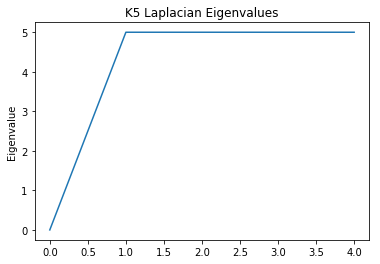

K5.3 Laplacian Eigenvalues: [-0.  0.  3.  3.  5.  5.  5.  5.]


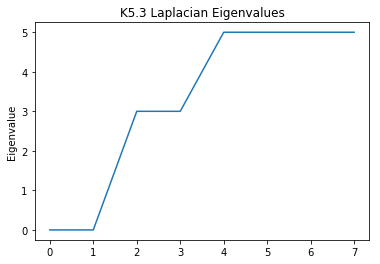

K5.3e Laplacian Eigenvalues: [-0.     0.374  3.     3.485  5.     5.     5.     6.141]


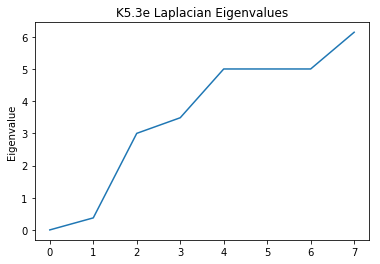

B2.3 Laplacian Eigenvalues: [0. 2. 2. 3. 5.]


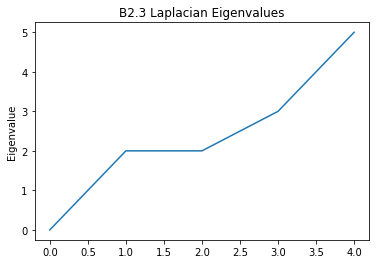

S5 Laplacian Eigenvalues: [0. 1. 1. 1. 5.]


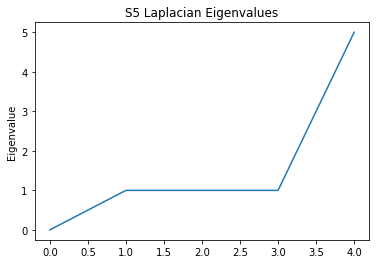

P5 Laplacian Eigenvalues: [0.    0.382 1.382 2.618 3.618]


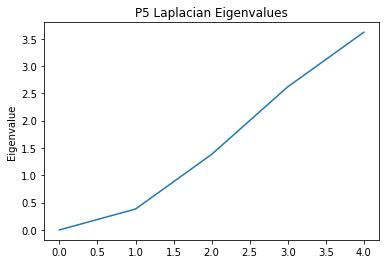

In [155]:
plt_L_eigenvalue(K5,"K5 Laplacian Eigenvalues")
plt_L_eigenvalue(K5_3,"K5.3 Laplacian Eigenvalues")
plt_L_eigenvalue(K5_3e,"K5.3e Laplacian Eigenvalues")
plt_L_eigenvalue(B2_3,"B2.3 Laplacian Eigenvalues")
plt_L_eigenvalue(S5,"S5 Laplacian Eigenvalues")
plt_L_eigenvalue(P5,"P5 Laplacian Eigenvalues")

Answer the following questions:
1. What can you say about the largest and the smallest eigenvalues?
2. What is the multiplicity (how many times the same eigenvalue appears) of the zero eigenvalue for each of the cases?
3. If K53 graph would be generalized to include c>2 components, what can you say about the multiplicity of the zero eigenvalues?
4. If graph G is connected (i.e., the number of disconnected components is one), what can you say about the multiplicity of the zero eigenvalue?
5. For the bi-partite graph, what is the value of the second smallest eigenvalue?
6. Is the vector, whose components consist of 1's only, the eigenvector of the Laplacian? If it is, then what is its corresponding eigenvalue?
7. Suppose the graph Laplacian matrix has the zero eigenvalue of multiplicity k. Can you say anything about the structure of such a graph?


*Put answers here*
1. The largest eigenvalues are corresponding to the number of vertices. The smallest eigenvalue is 0, which indicates the number of disconnected components.
2. All the graph is 1 except K5.3, which is 2. The number of zero eigenvalue is corresponeding to the number of disconnected components
3. As components increase, the multiplicity of the zero eigenvalues is equal to the number of components.
4. As components increase, the multiplicity of the zero eigenvalues remains 1 because the multiplicity of the zero eigenvalue is correponeding the number of disconnected component. Thus, the connected graph will always 1.
5. The second smallest eigenvalue is 2.
6. Yes, the corresonding eigenvalue is 0. Reference: https://en.wikipedia.org/wiki/Laplacian_matrix
7. The k can be represented the number of unconnected components as the result show in question 3. If k =1, the graph is connected as the result show in question 4.

In [135]:
# This part is for answering the subproblem in quesion 3.
g = Graph.Full(5)
for i in range(2,10):
    g += Graph.Full(3)
    number_of_0 = np.count_nonzero(np.around(np.linalg.eigvals(g.laplacian()), decimals=3) == 0)
    print (f'When c={i},  the multiplicity of the zero eigenvalues is {number_of_0}')

When c=2,  the multiplicity of the zero eigenvalues is 2
When c=3,  the multiplicity of the zero eigenvalues is 3
When c=4,  the multiplicity of the zero eigenvalues is 4
When c=5,  the multiplicity of the zero eigenvalues is 5
When c=6,  the multiplicity of the zero eigenvalues is 6
When c=7,  the multiplicity of the zero eigenvalues is 7
When c=8,  the multiplicity of the zero eigenvalues is 8
When c=9,  the multiplicity of the zero eigenvalues is 9


In [136]:
# This part is for answering the subproblem in quesion 4.
for i in range(2,10):
    g = Graph.Full(5)
    number_of_0 = np.count_nonzero(np.around(np.linalg.eigvals(g.laplacian()), decimals=3) == 0)
    print (f'When c={i},  the multiplicity of the zero eigenvalues is {number_of_0}')

When c=2,  the multiplicity of the zero eigenvalues is 1
When c=3,  the multiplicity of the zero eigenvalues is 1
When c=4,  the multiplicity of the zero eigenvalues is 1
When c=5,  the multiplicity of the zero eigenvalues is 1
When c=6,  the multiplicity of the zero eigenvalues is 1
When c=7,  the multiplicity of the zero eigenvalues is 1
When c=8,  the multiplicity of the zero eigenvalues is 1
When c=9,  the multiplicity of the zero eigenvalues is 1
